In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:
import tensorflow_datasets as tfds

In [4]:
(train_dataset,test_dataset),info=tfds.load('cats_vs_dogs',split=('train[:80%]','train[80%:]'),as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.V1BQC0_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [5]:
len(train_dataset),len(test_dataset)
print(train_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [6]:
for x,y in train_dataset:
  print(x.shape,y.numpy())
  image_1=x.numpy()
  break

(262, 350, 3) 1


In [7]:
import matplotlib.pyplot as plt

In [8]:
import tensorflow as tf
def normalize_img(image,label):
  return tf.cast(image,tf.float32)/255.0,label
def resize_img(image,label):
  return tf.image.resize(image,(224,224)),label


In [9]:
train_dataset=train_dataset.map(normalize_img)
train_dataset=train_dataset.map(resize_img)

In [10]:
SHUFFLE_VAL=len(train_dataset) // 1000
BATCH_SIZE= 4

train_dataset=train_dataset.shuffle(SHUFFLE_VAL)
train_dataset=train_dataset.batch(BATCH_SIZE)

train_dataset=train_dataset.prefetch(tf.data.AUTOTUNE)

In [11]:
test_dataset=test_dataset.map(normalize_img)
test_dataset=test_dataset.map(resize_img)

In [12]:
test_dataset=test_dataset.batch(BATCH_SIZE)
test_dataset=test_dataset.prefetch(tf.data.AUTOTUNE)

In [13]:
for (img,label) in train_dataset:
  print(img.numpy().shape,label.numpy())
  break

(4, 224, 224, 3) [1 0 1 1]


In [14]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def AlexNet():
  inputs=layers.Input(shape=(224,224,3))
  x=layers.Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu')(inputs)
  x=layers.BatchNormalization()(x)
  x=layers.MaxPool2D(3,2)(x)
  x=layers.Conv2D(256,5,1,activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.MaxPool2D(3,2)(x)
  x=layers.Conv2D(384,3,1,activation='relu')(x)
  x=layers.Conv2D(384,3,1,activation='relu')(x)
  x=layers.Conv2D(256,3,1,activation='relu')(x)
  x=layers.MaxPool2D(3,2)(x)
  x=layers.Flatten()(x)
  x=layers.Dense(4096,activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  x=layers.Dense(4096,activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  outputs=layers.Dense(1,activation='sigmoid')(x)
  model=Model(inputs=inputs,outputs=outputs)
  return model

model=AlexNet()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 54, 54, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,586,689 (82.35 MB)

 Trainable params: 21,585,985 (82.34 MB)

 Non-trainable params: 704 (2.75 KB)

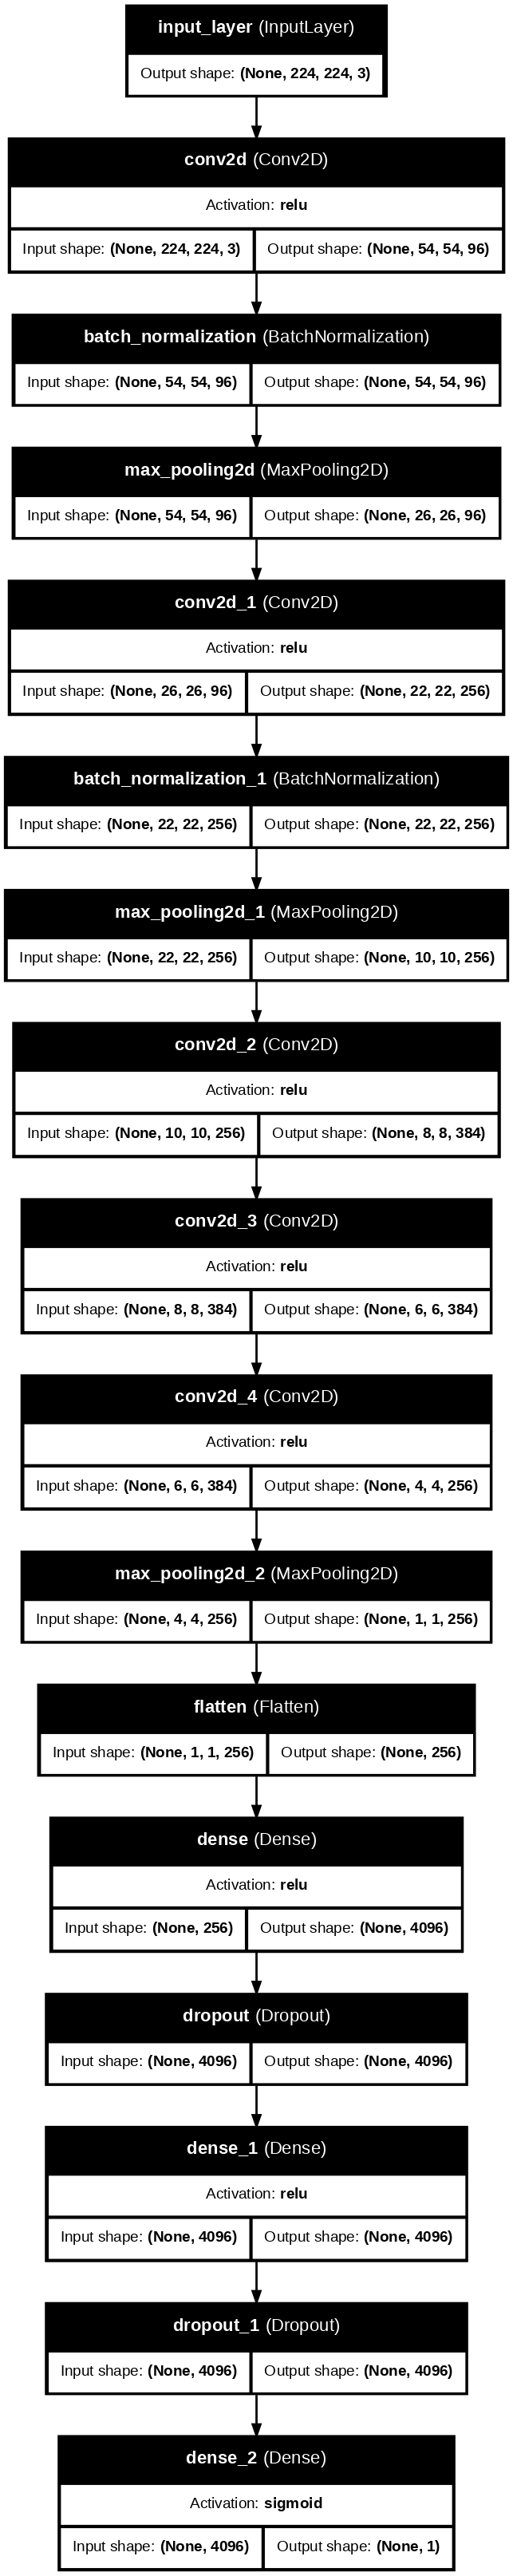

In [15]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,


    show_layer_activations=True,
    dpi=100,

)

In [16]:
for (img,label) in train_dataset:
  print(model(img).numpy().shape,label.numpy())
  print(model(img).numpy())
  break

  break

(4, 1) [0 1 1 0]
[[0.4984386 ]
 [0.4987172 ]
 [0.49826357]
 [0.49811786]]


In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(optimizer=Adam(learning_rate =0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='loss',patience=5)

In [ ]:
# Run this when training your model
history = model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[early_stopping])


Epoch 1/6
 521/4653 ━━━━━━━━━━━━━━━━━━━━ 49:51 724ms/step - accuracy: 0.5021 - loss: 0.7514

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# Plot loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/fashion-mnist_test.csv')
print(data.tail(4))

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:

history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test, y_test),
    shuffle=True
)




In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)
